## Group 9: Internal Project 

In [20]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd         # data manipulation & analysis
import numpy as np          # numerical & mathematical operations
import matplotlib.pyplot as plt         # for creating visualisations
import seaborn as  sns          # for more advanced visualisations 

In [35]:
df = pd.read_csv('C:/Users/ameli/Desktop/DAC/Retail_Store.csv', encoding='latin-1') 

Data Cleaning 

In [23]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [25]:
# Columns Customer Lname, Customer Zipcode, Order Zipcode, Product Description are missing values
# We will drop these columns
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [36]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# No duplicates out of 53 columns 

number of duplicate rows:  (0, 53)


In [39]:
# Dropping columns missing some values and other columns that provide no valuable data for analysis
df = df.drop(['Customer Lname','Customer Zipcode','Order Zipcode','Product Description', 'Customer Email', 'Customer Password', 'Product Image'],axis=1) 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Fname                 180519 non-null  object 
 12  Customer Id                   

## Exploring the Data

In [ ]:
# Converting date columns into date-time format for easier analysis

df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

C:\Users\ameli\AppData\Local\Temp\ipykernel_24800\854585478.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sales_by_quarter = df.resample('Q').size()


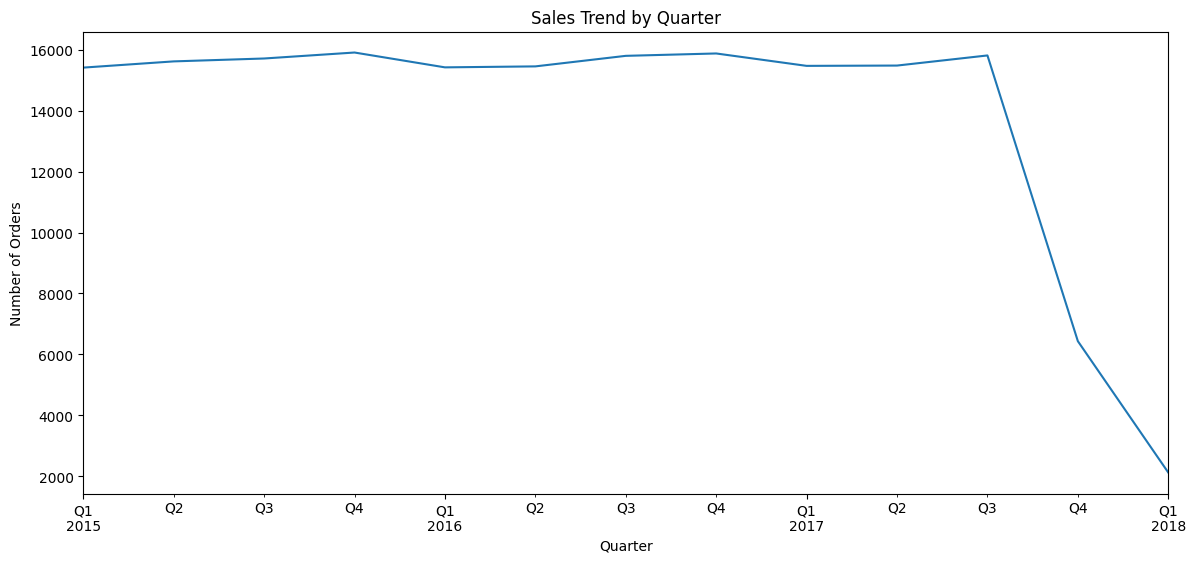

In [ ]:
# Set the date column as the index
df.set_index('order date (DateOrders)', inplace=True)

# Resample the data by quarter and count the number of orders per quarter
sales_by_quarter = df.resample('Q').size()

# Plot the data
plt.figure(figsize=(14, 6))
sales_by_quarter.plot(kind='line', title='Sales Trend by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Orders')
plt.show()


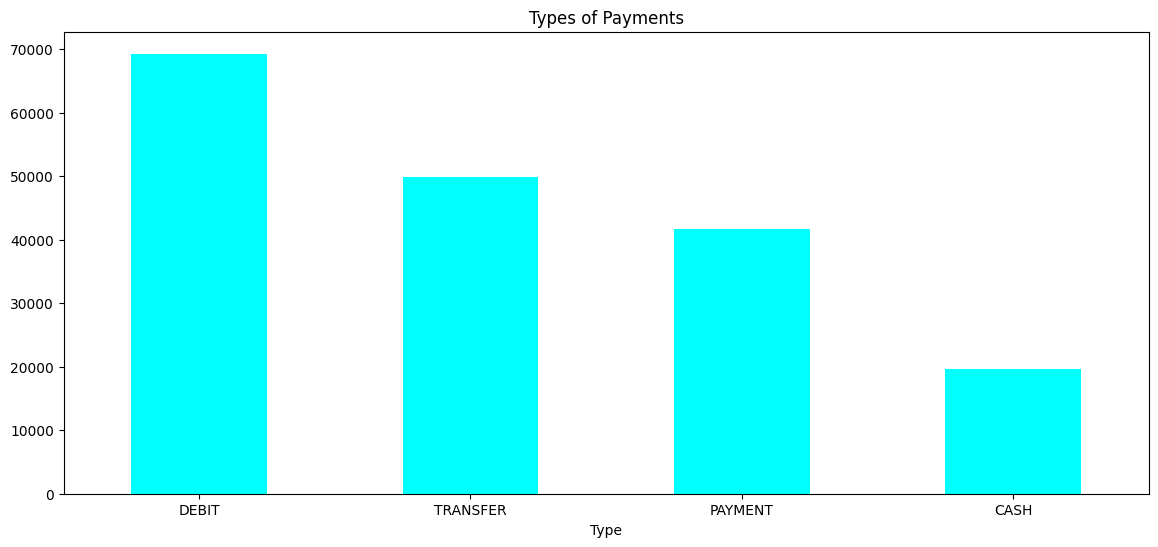

In [46]:
df['Type'].value_counts().plot(kind='bar', title='Types of Payments', color='cyan')
plt.xticks(rotation=0) 
plt.show()